 # ---> **LIBRERÍAS** <---

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
import random

from keras.models import Sequential
from keras.layers import Dense, Flatten


In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.9.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# ---> **IMPORTAR DATASETS** <---

In [3]:
lotes = 64
semilla = 33

nombre_dataset = 'cats20_probarV2'

train_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/TRAINING'
validation_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/VALIDATION'
test_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/TESTING'

In [4]:
def importarDatasets(dimensiones: tuple):
    
    train_dataset = tf.keras.utils.image_dataset_from_directory(
                train_directory,
                labels='inferred',
                label_mode='categorical',
                image_size=dimensiones,
                batch_size=lotes,
                seed=semilla
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
                validation_directory,
                labels='inferred',
                label_mode='categorical',
                image_size=dimensiones,
                batch_size=lotes,
                seed=semilla
    )

    testing_dataset = tf.keras.utils.image_dataset_from_directory(
            test_directory,
            labels='inferred',
            label_mode='categorical',
            image_size=dimensiones,
            batch_size=lotes,
            seed=semilla
    )
    
    class_names = train_dataset.class_names
    num_classes = len(class_names)

    return train_dataset, validation_dataset, testing_dataset, num_classes

 # ---> **MODELO4: EfficientNetB2 con GPU** <---

In [15]:
from keras.layers import Dropout, Rescaling, Conv2D, BatchNormalization, MaxPooling2D

dimensionesModelo4 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo4)

dimension_foto = dimensionesModelo4[0]

model4 = Sequential()

# Capa de normalización
model4.add(Rescaling(1./255))

model4.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

# So padding="same" in Keras does not mean the spatial dimensions do not change. 
# It just means that padding is added as required to make up for overlaps when the input size and kernel size do not perfectly fit.

# I think the reason is to make pool_size and stride arguments compatible with the output shape of previous layers. 
# The command can be read as: in case it's not compatible, add padding all hyperparameters compatible.

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
#model4.add(Dropout(0.3))
model4.add(Dense(64, activation='relu'))
#model4.add(Dropout(0.2))
model4.add(Dense(64, activation='relu'))
#model4.add(Dropout(0.1))
model4.add(Dense(num_classes, activation='softmax')) # cada neurona se activa con un porcentaje

model4.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model4.summary()



Found 10915 files belonging to 31 classes.
Found 3101 files belonging to 31 classes.
Found 1539 files belonging to 31 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (32, 224, 224, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 224, 224, 16)        448       
                                                                 
 batch_normalization_12 (Bat  (32, 224, 224, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 112, 112, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 112, 112, 32)        4640

In [16]:
import time

model4.compile(
  optimizer=tf.keras.optimizers.SGD(momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy']
)

inicio = time.time()

history = model4.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=40,
                    verbose=1,
                    shuffle=True,
)

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/40


171/171 [==============================] - 17s 91ms/step - loss: 2.9195 - accuracy: 0.1750 - val_loss: 3.8035 - val_accuracy: 0.0274
Epoch 2/40
171/171 [==============================] - 15s 85ms/step - loss: 2.3816 - accuracy: 0.3084 - val_loss: 3.1957 - val_accuracy: 0.1496
Epoch 3/40
171/171 [==============================] - 15s 85ms/step - loss: 2.1070 - accuracy: 0.3720 - val_loss: 2.2621 - val_accuracy: 0.3602
Epoch 4/40
171/171 [==============================] - 15s 84ms/step - loss: 1.8511 - accuracy: 0.4464 - val_loss: 2.5439 - val_accuracy: 0.3128
Epoch 5/40
171/171 [==============================] - 15s 85ms/step - loss: 1.5947 - accuracy: 0.5081 - val_loss: 3.0282 - val_accuracy: 0.2567
Epoch 6/40
171/171 [==============================] - 15s 85ms/step - loss: 1.3679 - accuracy: 0.5765 - val_loss: 2.4044 - val_accuracy: 0.3638
Epoch 7/40
171/171 [==============================] - 15s 85ms/step - loss: 1.1469 - accuracy: 0.6405 - val_loss: 2.1963 - val_accuracy: 0.4234
Epo

In [17]:
model4.save('MendozasNet60.keras')

 # ---> **RESULTADOS** <---

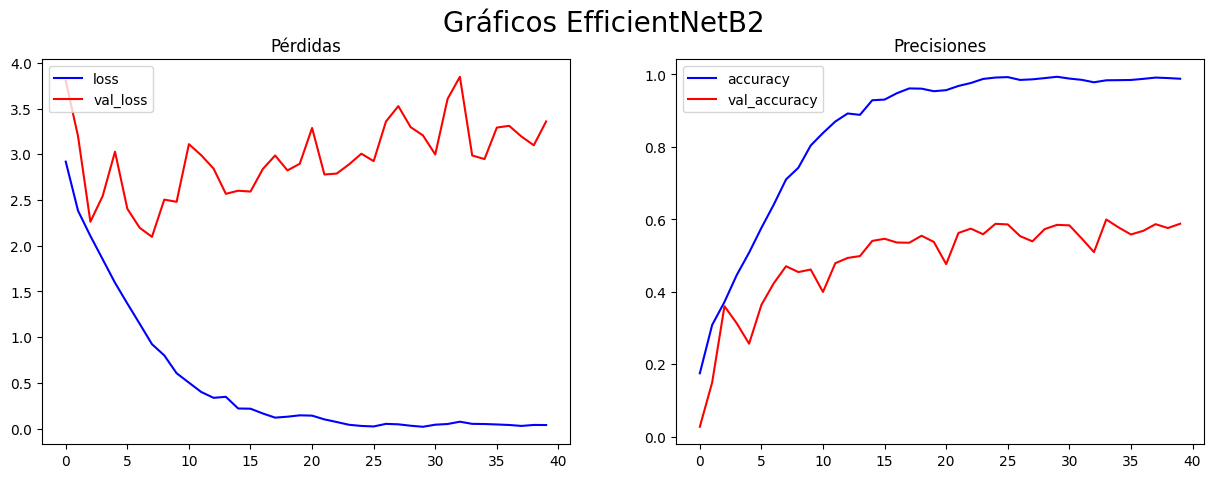

25/25 [==============================] - 2s 47ms/step - loss: 3.4072 - accuracy: 0.5660
***** Test loss:  3.407160520553589
***** Test accuracy:  0.565951943397522


In [18]:
fig = plt.figure(figsize=(15,5))

# Primera posición en figura de 1 fila y 2 columnas
fig.add_subplot(1,2,1)
plt.title(label='Pérdidas')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

# Segunda posición en figura de 1 fila y 2 columnas
fig.add_subplot(1,2,2)
plt.title(label='Precisiones')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos EfficientNetB2', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc = model4.evaluate(testing_dataset, verbose=1)
print('***** Test loss: ', test_loss)
print('***** Test accuracy: ', test_acc)

 # ---> **PREDECIR IMÁGENES** <---

In [21]:
def predecir_imagenes(numFotosPredecir: int):
  directorio_base = test_directory
  lista_razas = os.listdir(directorio_base)

  figura = plt.figure(figsize=(20,10))
  class_names = os.listdir(train_directory)

  LISTA_NP_ARRAYS = []
  LISTA_RAZAS = []

  for i in range(numFotosPredecir): # nº de fotos a predecir
    raza_escogida = random.choice(lista_razas)
    LISTA_RAZAS.append(raza_escogida)
    directorio_raza = f'{directorio_base}/{raza_escogida}'
    nombre_imagen = random.choice(os.listdir(directorio_raza))
    print(directorio_raza, '::', nombre_imagen)

    imagen = Image.open(f'{directorio_raza}/{nombre_imagen}')
    imagen = imagen.resize(dimensionesModelo4)
    imagen = np.array(imagen)
    LISTA_NP_ARRAYS.append(imagen) # añado el numpy array
    imagen = np.expand_dims(imagen, axis=0)

    prediction_array = model4(imagen)  
    index_predicted = np.argmax(prediction_array)
    label_predicted = class_names[index_predicted]
    #------------------------------------------------------
    figura.add_subplot(2,3,i+1)
    plt.imshow(LISTA_NP_ARRAYS[i])
    plt.title(f"{LISTA_RAZAS[i]}, predicted: {label_predicted}")
  
  plt.show()

C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Abyssinian :: Abyssinian_251.jpg


C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Tabby :: Tabby_248.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Exotic Shorthair :: Exotic Shorthair_728.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Ginger :: Ginger_136.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Norwegian Forest :: Norwegian Forest_22.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Tuxedo :: Tuxedo_354.jpg


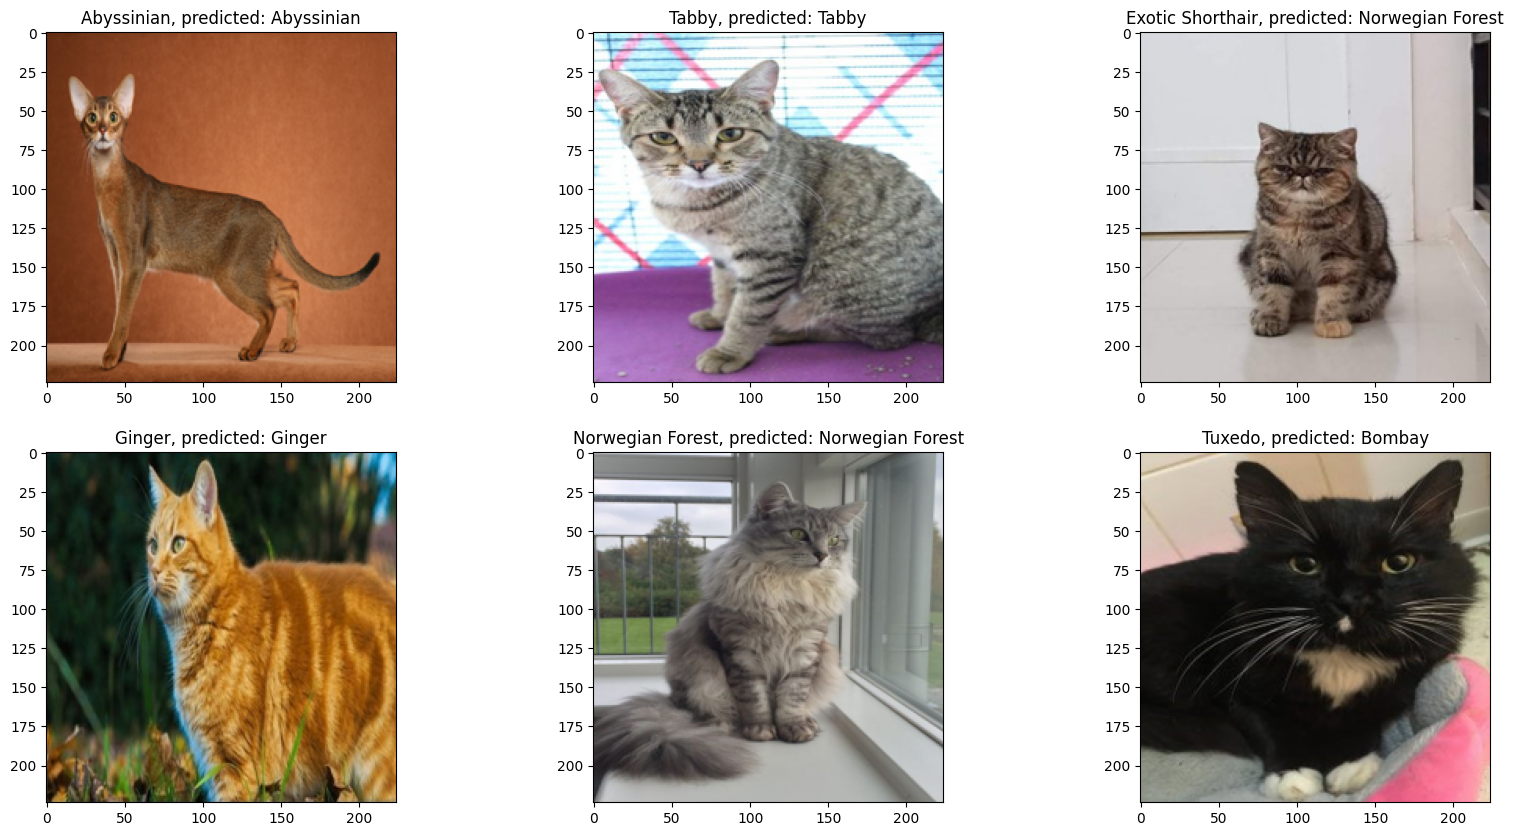

In [22]:
predecir_imagenes(6)

# ---> **IMÁGENES A MANO** <---

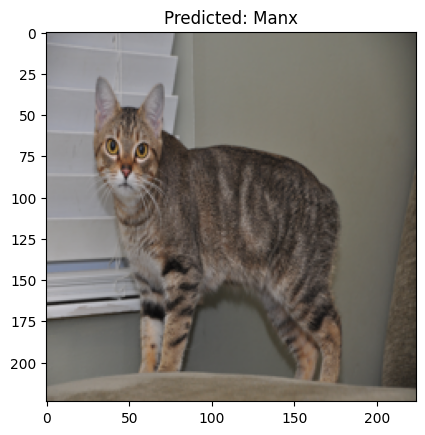

In [23]:
imagen22 = Image.open('AAmanx.jpg')
imagen22 = imagen22.resize(dimensionesModelo4)
imagen22 = np.array(imagen22)
auxiliar = imagen22
imagen22 = np.expand_dims(imagen22, axis=0)

class_names = os.listdir(test_directory)

prediction_array = model4(imagen22) # model.predict()
index_predicted = np.argmax(prediction_array[0]) # [[...]]
label_predicted = class_names[index_predicted]

#print('Prediction array: ', prediction_array)
plt.imshow(auxiliar)
plt.title(f'Predicted: {label_predicted}')
plt.show()

# ---> **MATRIZ DE CONFUSIÓN BUENA** <---

In [19]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    lote = imagenes/255
    predicciones = model4.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))   

1/1 [==============================] - 0s 81ms/step


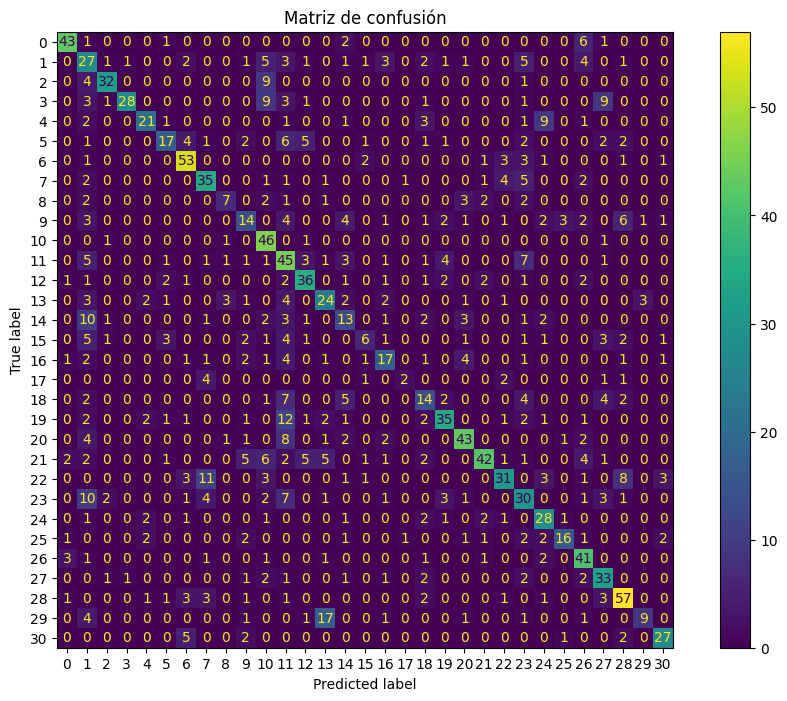

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matrix = confusion_matrix(true_labels, predicted_labels)

figura, axes = plt.subplots(figsize=(12, 8))
confusionMatrix = ConfusionMatrixDisplay(matrix)  # display_labels=lista_razas_test
confusionMatrix.plot(ax=axes, cmap='viridis')
confusionMatrix.ax_.set_title("Matriz de confusión")

plt.show()

# ---> **GUARDAR Y CARGAR MODELO** <---

In [25]:
import keras

model4.save("MendozasNet.keras")

instancia = keras.models.load_model("MendozasNet.keras")

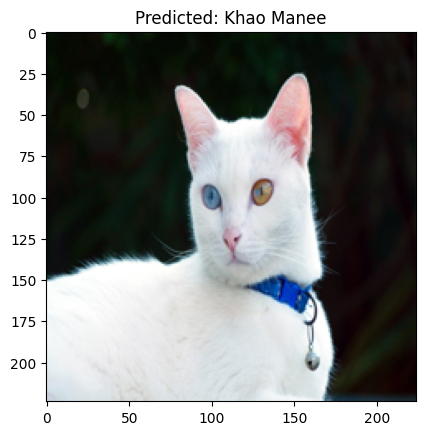

In [26]:
imagen22 = Image.open('AAkhao-manee.jpg')
imagen22 = imagen22.resize(dimensionesModelo4)
imagen22 = np.array(imagen22)
auxiliar = imagen22
imagen22 = np.expand_dims(imagen22, axis=0)

class_names = os.listdir(test_directory)

prediction_array = instancia(imagen22) # model.predict()
index_predicted = np.argmax(prediction_array[0]) # [[...]]
label_predicted = class_names[index_predicted]

#print('Prediction array: ', prediction_array)
plt.imshow(auxiliar)
plt.title(f'Predicted: {label_predicted}')
plt.show()